<img src="./img/microsemilogo.jpg"  style = "float: right"/>


# An Introduction to Pandas
***
**Josh Wilkins<br>3/15/2018**

In [1]:
# Imports \ CSS

import os
import glob
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
% matplotlib inline

# CSS
from IPython.core.display import HTML
styles = open("custom.css", "r").read()
HTML(styles)

## Context
***
This is an introduction to the third party package Pandas<br>
Pandas provides high-performance, easy-to-use data structure and data analysis tools for the Python<br>
Pandas is particularly useful for people working on data cleansing or data analysis.

Others are encouraged to improve and add onto this document; Add each new section in the block just prior to Revision History<br>
Use a Double-Point (##) header to automatically add it to the table of contents.

Current document location: \\bevfs01\Engineering_Projects\Training\Jupyter\Pandas\

## Useful References
***
- [10 Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
- [Pandas Intro at Tutorials Point](https://www.tutorialspoint.com/python_pandas/index.htm)

## Series
***
### Basics
A Series is a one-dimensional array like structure with homogeneous data.<br>

The constructor:<br>
**pandas.Series(data, index, dtype, copy)**
- **data**: The data to pass into the Series object; Can be a number, list, numpy array, or dictionary
- **index**: Row names default to an integer list, np.arrange(len(data)), but can be specified
- **dtype**: Data type is inferred unless specified
- **copy**: Defaults to False, but can copy the data that is passed in

In [2]:
# Creating a Series object

numbers = [1, 2, 3]
letters = ['a', 'b', 'c']
print pd.Series(data=numbers, index=letters)

a    1
b    2
c    3
dtype: int64


In [3]:
# Which is the same as from a dictionary
data = dict(zip(letters, numbers))
s = pd.Series(data)
print s

a    1
b    2
c    3
dtype: int64


In [4]:
# Indexing and slicing is applicable
print s[-1]

# Can also use the index as a label
print s['c']

3
3


### Methods
- **axes**: Returns a list of the row axis labels
- **dtype**: Returns the dtype of the object
- **empty**: Returns True if series is empty
- **size**: Returns the number of elements in the underlying data
- **values**: Returns the Series as ndarray
- **head(n)**: Returns the first n rows
- **tail(n)**: Returns the last n rows

In [5]:
# Returns a list of the row axis labels
print s.axes

[Index([u'a', u'b', u'c'], dtype='object')]


In [6]:
# Returns the data type of the object
print s.dtype

int64


In [7]:
# Returns True if series is empty
print s.empty

False


In [8]:
# Returns the number of elements in the underlying data
print s.size

3


In [9]:
# Returns the Series as ndarray
print s.values

[1 2 3]


In [10]:
# Returns the first n rows
print s.head(2) # Which is the same as s[:2]

a    1
b    2
dtype: int64


In [11]:
# Returns the last n rows
print s.tail(2) # Which is the same as s[-2:]

b    2
c    3
dtype: int64


## DataFrames
***
### Basics
A DataFrame is a two-dimensional array with heterogeneous data.<br>
Think of it as a collection of Series.

The Constructor:<br>
**pandas.DataFrame( data, index, columns, dtype, copy)**
- **data**: The data to pass into the Series object; Can be a list, numpy array, a Series, another DataFrame, or a dictionary
- **index**: Row names default to an integer list, np.arrange(len(data)), but can be specified
- **columns**: Column names default to an integer list, np.arrange(len(data)), but can be specified
- **dtype**: Data type of each column is inferred unless specified
- **copy**: Defaults to False, but can copy the data that is passed in

DataFrame Creation

In [12]:
data = [['Alex', 10], ['Bob', 12], ['Clarke', 13]]
df = pd.DataFrame(data, index=["a", "b", "c"], columns=['Name','Age'])
print df

     Name  Age
a    Alex   10
b     Bob   12
c  Clarke   13


From a dictionary

In [13]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)
print df

   Age   Name
0   28    Tom
1   34   Jack
2   29  Steve
3   42  Ricky


Column Selection

In [14]:
print df['Age'] # Same as df.Age

0    28
1    34
2    29
3    42
Name: Age, dtype: int64


### Basic Methods
- **T**:Transposes rows and columns
- **axes**: Returns a list with the row axis labels and column axis labels as the only members
- **dtypes**: Returns the dtypes in this object
- **empty**: True if NDFrame is entirely empty [no items]; if any of the axes are of length 0
- **ndim**: Number of axes / array dimensions
- **shape**: Returns a tuple representing the dimensionality of the DataFrame
- **size**: Number of elements in the NDFrame
- **values**: Numpy representation of NDFrame
- **head()**: Returns the first n rows
- **tail()**: Returns last n rows

In [15]:
# Transposes rows and columns
print df.T

        0     1      2      3
Age    28    34     29     42
Name  Tom  Jack  Steve  Ricky


In [16]:
# Returns a list with the row axis labels and column axis labels as the only members
print df.axes

[RangeIndex(start=0, stop=4, step=1), Index([u'Age', u'Name'], dtype='object')]


In [17]:
# Returns the dtypes in this object
print df.dtypes

Age      int64
Name    object
dtype: object


In [18]:
# True if NDFrame is entirely empty [no items]; if any of the axes are of length 0
print df.empty

False


In [19]:
# Number of axes / array dimensions
print df.ndim

2


In [20]:
# Returns a tuple representing the dimensionality of the DataFrame
print df.shape

(4, 2)


In [21]:
# Returns the number of elements in the underlying data
print df.size

8


In [22]:
# Returns the Series as ndarray
print df.values

[[28L 'Tom']
 [34L 'Jack']
 [29L 'Steve']
 [42L 'Ricky']]


In [23]:
# Returns the first n rows
print df.head(2) # Which is the same as s[:2]

   Age  Name
0   28   Tom
1   34  Jack


In [24]:
# Returns the last n rows
print df.tail(2) # Which is the same as s[-2:]

   Age   Name
2   29  Steve
3   42  Ricky


### Statistical Functions
- **sum(axis=1)**: Returns the sum of the row or column
- **mean(axis=1)**: Returns a list with the row axis labels and column axis labels as the only members
- **std(axis=1)**: Returns the dtypes in this object

##  Panels
***
### Basics
A Panel is a three-dimensional data structure with heterogeneous data.<br>
Think of it as a collection of DataFrames<br>
Panels are not very commonly used

The constructor
**pandas.Panel(data, items, major_axis, minor_axis, dtype, copy)**
- **data**:	Data takes various forms like ndarray, series, map, lists, dict, constants and also another DataFrame
- **items**:	axis=0
- **major_axis**:	axis=1
- **minor_axis**:	axis=2
- **dtype**:	Data type of each column
- **copy**:	Copy data. Default, false

In [25]:
data = np.array( [ [ [1,2,3], [4,5,6] ], [ [1,2,3], [4,5,6] ] ] )
p = pd.Panel(data)
print p

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 2 (major_axis) x 3 (minor_axis)
Items axis: 0 to 1
Major_axis axis: 0 to 1
Minor_axis axis: 0 to 2


## CSV Files
***
[The constructor](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

### An example

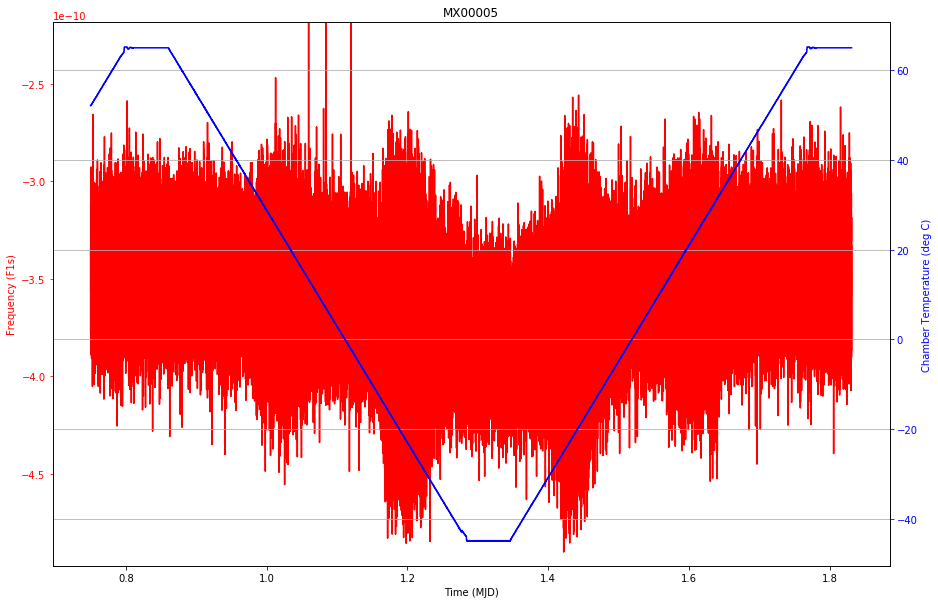

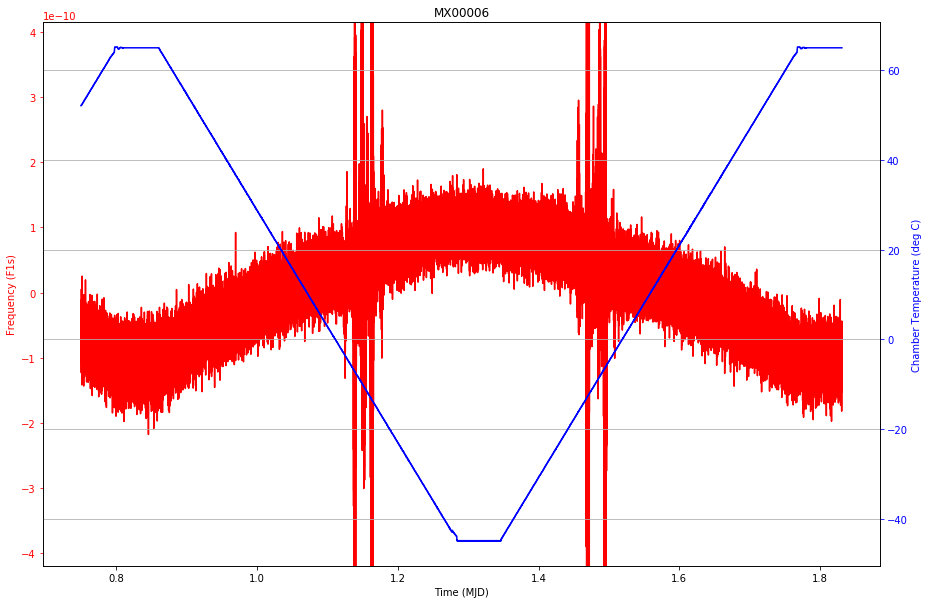

In [26]:
rcParams['figure.figsize'] = (15, 10)

# .mxd files are in csv format, so the same would work for actual .csv files
mxd_files = glob.glob(".\\Data\\*.mxd")  # Grab all mxd files in Data folder

for mxd_file in mxd_files:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    df = pd.read_csv(mxd_file)
    df.MJD = df.MJD - df.MJD[0]  # Remove MJD offset to make time axis meaningful
    df = df[df.MJD > 0.75]
    ax.plot(df.MJD, df["F1s"], 'r')
    ax.set_xlabel("Time (MJD)")
    ax.set_ylabel("Frequency (F1s)")
    ax.tick_params(axis='y', colors='red')
    ax.yaxis.label.set_color('red')
    
    mean = df["F1s"].mean()
    std = df["F1s"].std()
    ax.set_ylim([mean - 5*std, mean + 5*std])
        
    ax2 = ax.twinx()
    ax2.plot(df.MJD, df["ChamberTemp"], 'b')
    ax2.set_ylabel("Chamber Temperature (deg C)")
    ax2.tick_params(axis='y', colors='blue')
    ax2.yaxis.label.set_color('blue')
    ax2.grid()
    
    plt.title(mxd_file[11:18])
    plt.show()